In [1]:
from FluroView import*
from skimage.io import*

In [2]:
##This is a composite confocal image of primary hippocampal neurons.
##High affinity bungarotoxin receptors were stained with fluorescent 
##bungarotoxin (c=1). The nicotinic acetylcholine alpha7 subunit is 
##immunofluorescently labeled (c=2). A nAChR chaperone protein fused 
##with CFP was transiently transfected into the neurons (c=3). Nuclei 
##were dyed with Hoechst (c=4). A Nomarski optics image shows the 
##morphology of the neuron (c=5). Image is courtesy of John Alexander.

eximg = imread('Rat_Hippocampal_Neuron.tif')
eximg.shape

(5, 512, 512)

### Creating the MultiChannel Image wherein we can specify the channels, the name of the Channels and colormaps

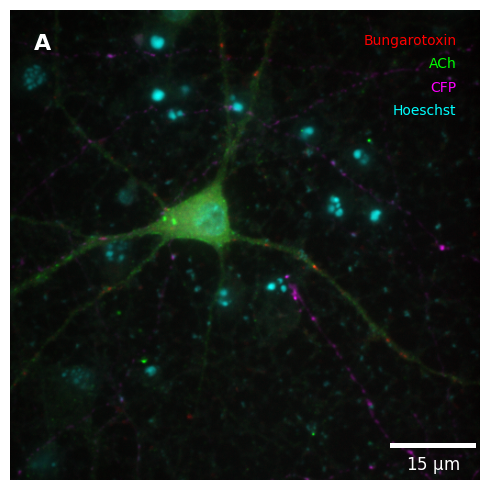

In [3]:
eximg = imread('Rat_Hippocampal_Neuron.tif')
exim = MultiChannelImage(
    channels=[eximg[0], eximg[1], eximg[2], eximg[3]],
    channel_names=['Bungarotoxin','ACh','CFP','Hoeschst'],
    colormaps=['pure_red','pure_green','pure_magenta','pure_cyan']
)

fig, ax = MultiChannelImage.create_multichannel_figure(
        exim, 
        pixel_size=0.16,
        units='um',
        panel_label='A',  
        rescale=True, 
        label_position='top-right',
        label_color='black',
        channel_label_show=True,
        scalebar_color='white',
        scalebar_font_size=12,
        panel_label_color='white',
        panel_label_font_size=16,
        channel_label_font_size=10,
        scalebar_position='lower right',
        panel_label_position='upper left',
        figsize=(15,5)
    )

#### Creating `MultiChannelImage` object for each channel

In [5]:
exim1 = MultiChannelImage(
    channels=[eximg[0]],
    channel_names=['Bungarotoxin'],
    colormaps=['pure_red'])

exim2 = MultiChannelImage(
    channels=[eximg[1]],
    channel_names=['ACh'],
    colormaps=['pure_green'])

exim3 = MultiChannelImage(
    channels=[eximg[2]],
    channel_names=['CFP'],
    colormaps=['pure_magenta'])

exim4 = MultiChannelImage(
    channels=[eximg[3]],
    channel_names=['Hoeschst'],
    colormaps=['pure_cyan'])

### Using the `ImagePanel` class to plot each of the `MultiChannelImage` object side by side. All the scaling, spacing are handled automatically to generate a clean plot.

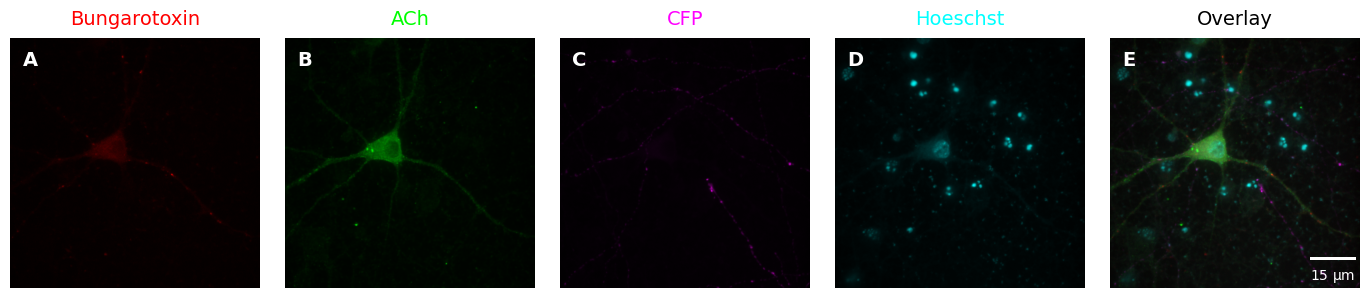

In [7]:
panel = ImagePanel(1,5,figsize=(15,5))
panel.add_multichannel_image(0, 0, exim1, title='Bungarotoxin', panel_label='A')
panel.add_multichannel_image(0, 1, exim2, title='ACh', panel_label='B')
panel.add_multichannel_image(0, 2, exim3, title='CFP', panel_label='C')
panel.add_multichannel_image(0, 3, exim4, title='Hoeschst', panel_label='D')
panel.add_multichannel_image(0, 4, exim, title='Overlay', panel_label='E',scalebar=True, pixel_size=0.16,units='um',set_title_color_default=True)
panel.adjust_layout()
panel.show();
